In [35]:
import datetime
import time 

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('footballua_data.csv', encoding='utf-8', parse_dates=['DateTime'])

In [39]:
df.head()

,DateTime,Title,index,dateINT
0,2017-01-01 08:00:00,АПЛ. Анонс 19-го тура. Матчи воскресенья,0,1483257600
1,2017-01-01 08:17:00,Рейнджерс — Селтик 1:2,1,1483258620
2,2017-01-01 08:38:00,Официально: Мишел Бастос — игрок Палмейраса,2,1483259880
3,2017-01-01 08:57:00,Челси повторил рекорд Арсенала,3,1483261020
4,2017-01-01 09:23:00,Колорадо Рэпидз близок к подписанию воспитанни...,4,1483262580


In [40]:
df.dtypes

DateTime    datetime64[ns]
Title               object
index                int64
dateINT              int64
dtype: object

In [24]:
df.shape

(2973, 4)

In [6]:
del df['Unnamed: 0']

In [38]:
df['dateINT'] = pd.to_numeric(df.DateTime)//10**9

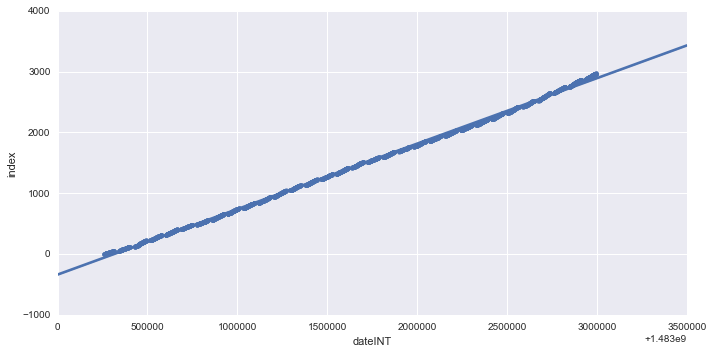

In [56]:
#2973 rows
x = sns.lmplot(x='dateINT', y='index',data=df,size=5, aspect=2)

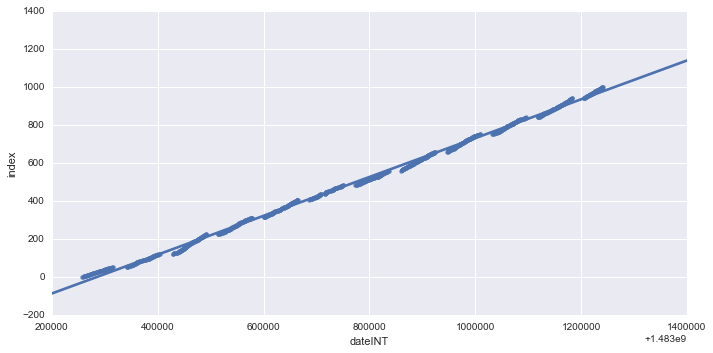

In [57]:
#first 1000 rows
sns.lmplot(x='dateINT', y='index',data=df[0:1000],size=5, aspect=2)

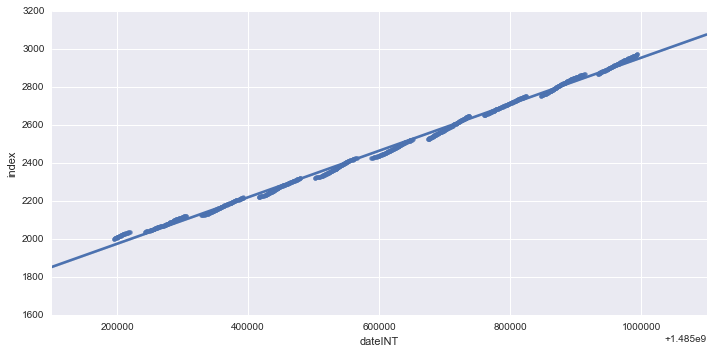

In [58]:
#last ~1000 rows
sns.lmplot(x='dateINT', y='index',data=df[2000:],size=5, aspect=2)

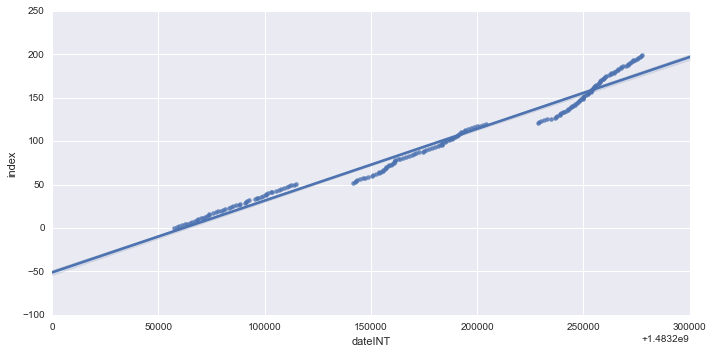

In [60]:
#first 200 rows
sns.lmplot(x='dateINT', y='index',data=df[:200],size=5, aspect=2)

In [62]:
import statsmodels.api as sm
model = sm.RLM(df.index, df.dateINT, M=sm.robust.norms.LeastSquares())
results = model.fit()
results.params

dateINT    0.000001
dtype: float64

#### Подумайте над следующими вопросами:

##### О чем говорит наклон графика линейной модели?
Примерная частота выхода новостей, можно будет предсказать примерное пколичество новостей, которое будет выходить на день.

##### Как он соотносится с результатами полученными вами в предыдущем домашнем задании?
В ДЗ2 результат был 0.0010862811318968519
Тут 0.000001
Что-то пошло не так

##### Хорошо ли линейная аппроксимация подходит для ваших данных или видны систематические отклонения?
Видны отклонения в ночое время, тогда статьи вообще не публикуют.
Чаще всего, во второй половине дня публикуют новостей больше чем в первой

